<a href="https://colab.research.google.com/github/R3gm/InsightSolver-Colab/blob/main/SD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion 3 (SD3)

Diffusers version

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Repository | [![GitHub Repository](https://img.shields.io/github/stars/Stability-AI/generative-models?style=social)](https://github.com/Stability-AI/generative-models) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |

In [ ]:
!pip install -q diffusers==0.29.0 git+https://github.com/huggingface/transformers bitsandbytes accelerate sentencepiece peft

One important step is to accept the license agreement for using SD3. You need to have an account on Hugging Face and `accept the license to use the models`: https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers




Get your KEY TOKEN here: https://hf.co/settings/tokens "type: read"

In [ ]:
YOUR_HF_TOKEN = "" #@param {type:"string"}

In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline

model_repo = "stabilityai/stable-diffusion-3-medium-diffusers"

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    text_encoder_3=None,
    tokenizer_3=None,
    torch_dtype=torch.float16,
    token=YOUR_HF_TOKEN,
)
pipe.to("cuda")

  0%|          | 0/28 [00:00<?, ?it/s]

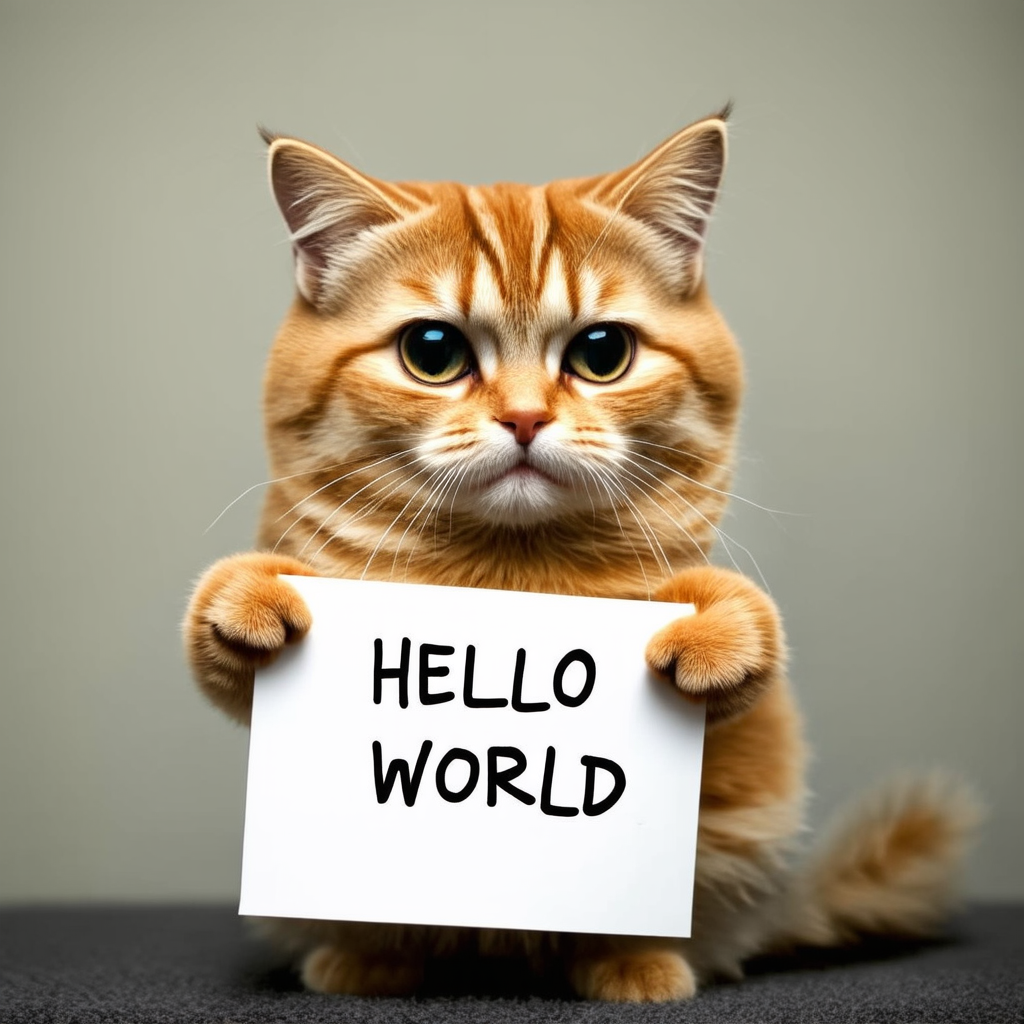

In [5]:
image = pipe(
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

image.save("sd3_hello_world-8bit-T5.png")
image

### A prompt for each text encoder

  0%|          | 0/28 [00:00<?, ?it/s]

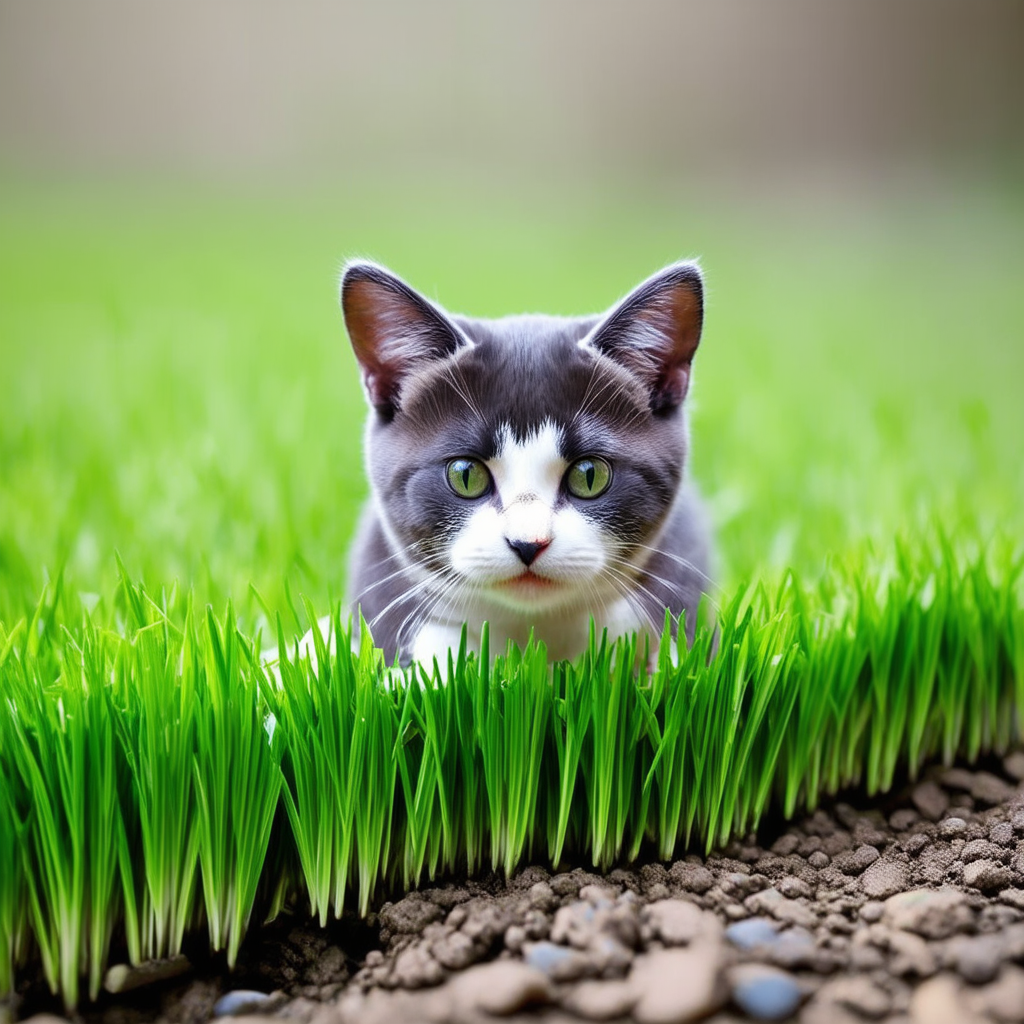

In [6]:
image = pipe(
    prompt="a photo of a cat holding a sign that says hello world",
    prompt_2="grass",
    # prompt_3="cat",
    negative_prompt="table",
    negative_prompt_2="white",
    # negative_prompt_3="day",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    clip_skip=2,

).images[0]

image

# Img2Img

In [7]:
from diffusers import StableDiffusion3Img2ImgPipeline
from diffusers.utils import load_image
import torch, gc

torch.cuda.empty_cache()
gc.collect()

pipe_img2img = StableDiffusion3Img2ImgPipeline(**pipe.components)

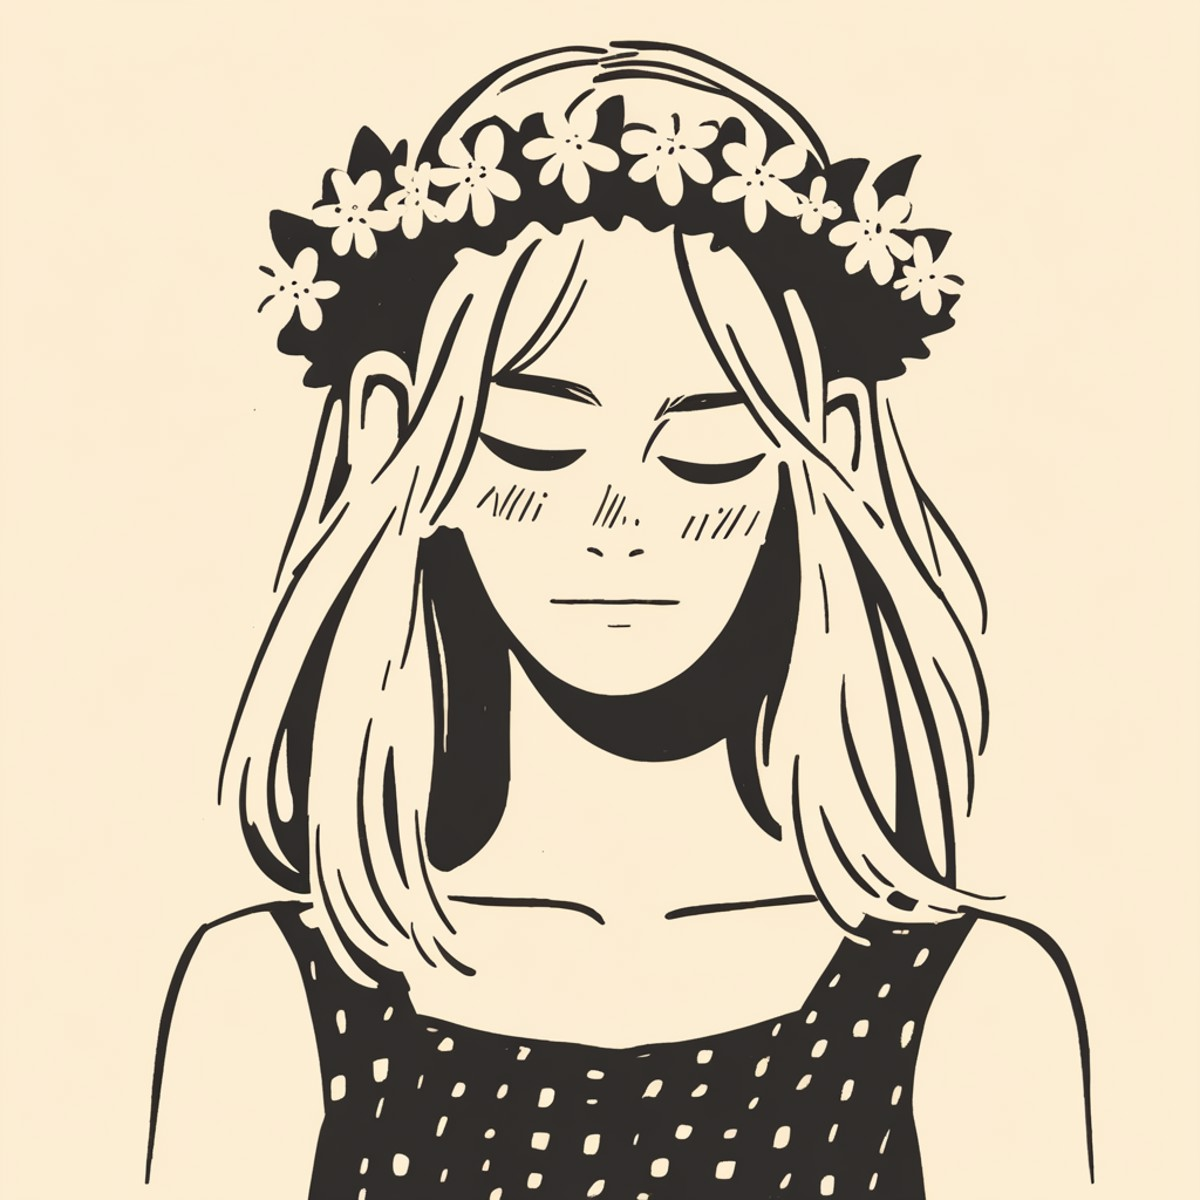

In [8]:
demo_image = load_image("https://huggingface.co/alvdansen/BandW-Manga/resolve/main/images/BW_e000014_00_20240610214140.jpeg?download=true")
demo_image

  0%|          | 0/23 [00:00<?, ?it/s]

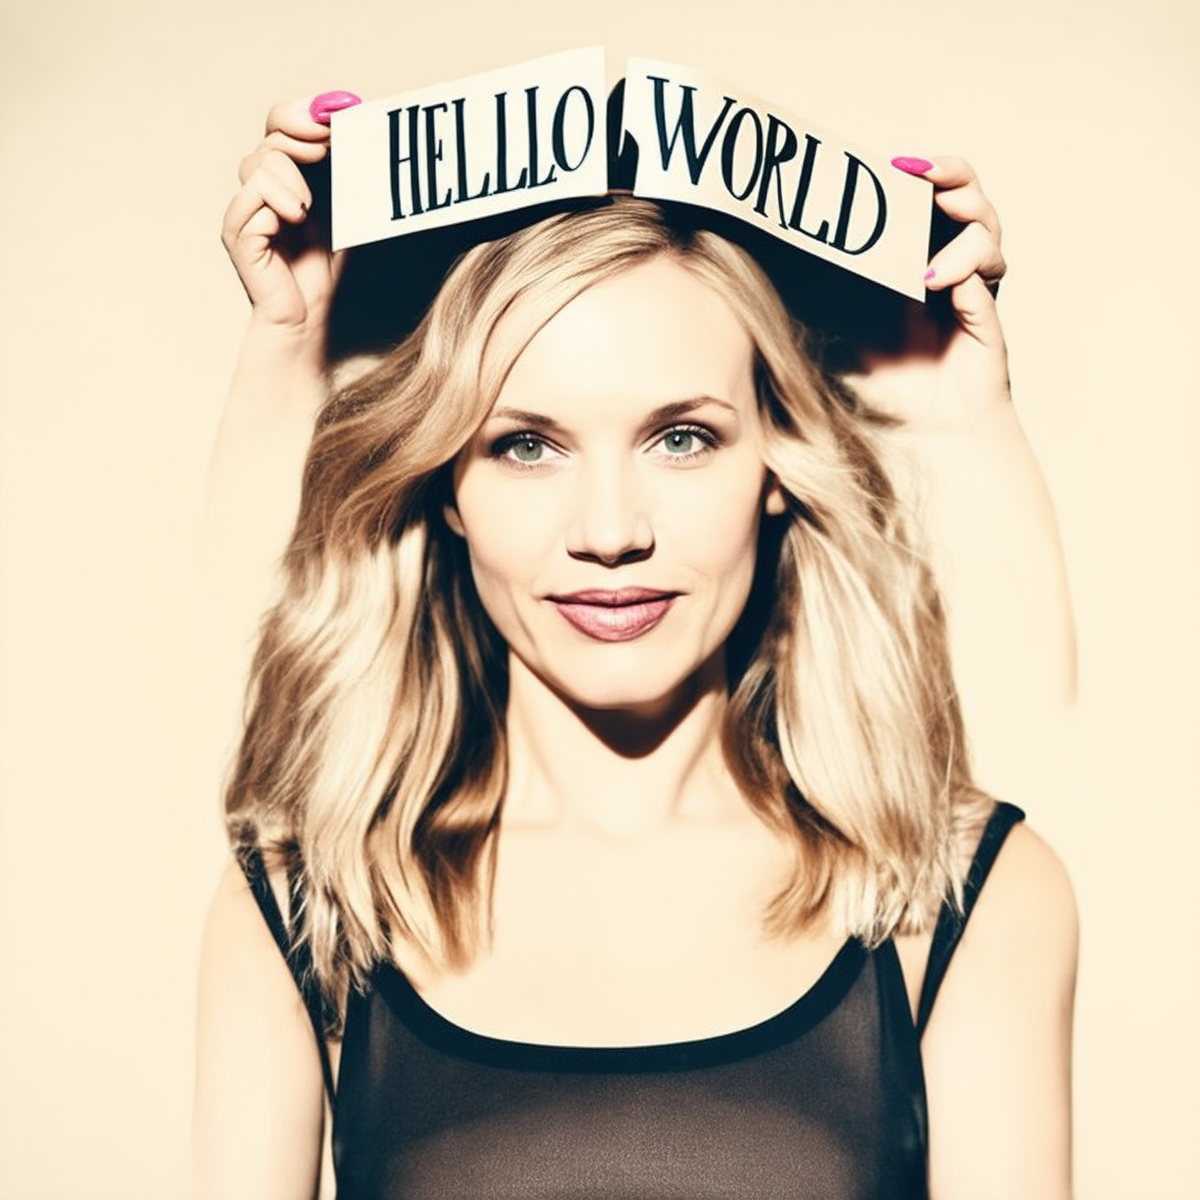

In [9]:
image_out = pipe_img2img(
    prompt="a photo of a woman holding a sign that says hello world",
    negative_prompt="manga",
    image=demo_image,
    strength=0.8,
    num_inference_steps=28,
    guidance_scale=7.0,
    clip_skip=2,
    num_images_per_prompt=1,

).images[0]

image_out